In [1]:

from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

In [2]:
Wine = datasets.load_wine()

In [3]:
Wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
#Mostramos la data de en forma de data set
df = pd.DataFrame(Wine.data,columns=Wine.feature_names)
df['label'] = Wine.target

In [5]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
#Obtenemos informacion importante del data set
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [7]:
df.shape

(178, 14)

Analisis de datos

In [8]:
df_label = df.label.astype('int64').astype('category').copy()
frecuencia=df_label.value_counts()
frecuencia.sort_index()

0    59
1    71
2    48
Name: label, dtype: int64

<Axes: >

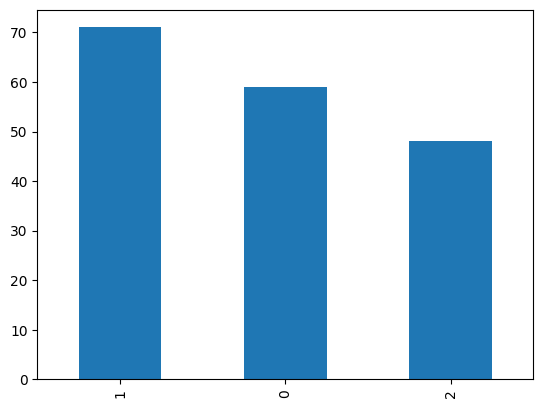

In [9]:
frecuencia.plot(kind='bar')

array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'magnesium'}>],
       [<Axes: title={'center': 'color_intensity'}>, <Axes: >]],
      dtype=object)

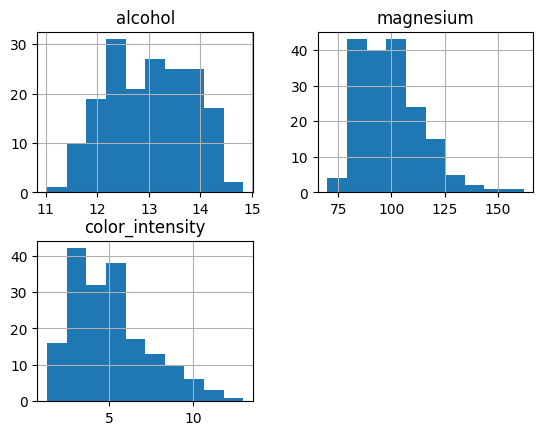

In [10]:
df[['alcohol','magnesium','color_intensity']].hist()

Normalizar datos

In [11]:
#Realizamos una copia de los datos esto es importante por el concepto de valor y referencia
list_FN = Wine.feature_names.copy()
list_FN.append('label')
list_FN 

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline',
 'label']

In [12]:
datos = df.values.copy()
min_max_scaler = preprocessing.MinMaxScaler()
datos_scaled = min_max_scaler.fit_transform(datos)
df_Normalizado = pd.DataFrame(datos_scaled,columns=list_FN)

In [13]:
df_Normalizado

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529,1.0
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662,1.0
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290,1.0
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856,1.0


In [14]:
x = df_Normalizado.iloc[:,df_Normalizado.columns != 'label'].values.copy()
y = df['label'].values.copy()

In [15]:
x

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [16]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [17]:
# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_transformed = lda.fit_transform(x, y)
X_transformed

array([[-4.70024401,  1.97913835],
       [-4.30195811,  1.17041286],
       [-3.42071952,  1.42910139],
       [-4.20575366,  4.00287148],
       [-1.50998168,  0.4512239 ],
       [-4.51868934,  3.21313756],
       [-4.52737794,  3.26912179],
       [-4.14834781,  3.10411765],
       [-3.86082876,  1.95338263],
       [-3.36662444,  1.67864327],
       [-4.80587907,  2.23536271],
       [-3.42807646,  2.17510939],
       [-3.66610246,  2.26248961],
       [-5.58824635,  2.05478773],
       [-5.50131449,  3.61304865],
       [-3.18475189,  2.88952528],
       [-3.28936988,  2.76584266],
       [-2.99809262,  1.42511132],
       [-5.24640372,  3.70982655],
       [-3.13653106,  1.97689922],
       [-3.57747791,  0.5624599 ],
       [-1.69077135,  0.91342136],
       [-4.83515033,  0.9147628 ],
       [-3.09588961,  0.61735888],
       [-3.32164716,  0.29847734],
       [-2.14482223,  0.16369247],
       [-3.9824285 ,  2.17515679],
       [-2.68591432,  1.21850924],
       [-3.56309464,

In [18]:
X_transformed[y == 0, 0]

array([-4.70024401, -4.30195811, -3.42071952, -4.20575366, -1.50998168,
       -4.51868934, -4.52737794, -4.14834781, -3.86082876, -3.36662444,
       -4.80587907, -3.42807646, -3.66610246, -5.58824635, -5.50131449,
       -3.18475189, -3.28936988, -2.99809262, -5.24640372, -3.13653106,
       -3.57747791, -1.69077135, -4.83515033, -3.09588961, -3.32164716,
       -2.14482223, -3.9824285 , -2.68591432, -3.56309464, -3.17301573,
       -2.99626797, -3.56866244, -3.38506383, -3.5275375 , -2.85190852,
       -2.79411996, -2.75808511, -2.17734477, -3.02926382, -3.27105228,
       -2.92065533, -2.23721062, -4.69972568, -1.23036133, -2.58203904,
       -2.58312049, -3.88887889, -3.44975356, -2.34223331, -3.52062596,
       -3.21840912, -4.38214896, -4.36311727, -3.51917293, -3.12277475,
       -1.8024054 , -2.87378754, -3.61690518, -3.73868551])

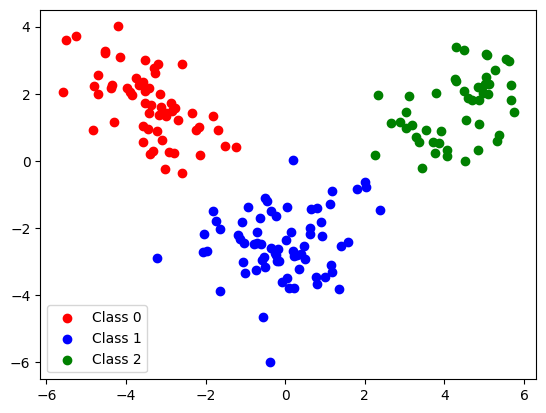

In [19]:
# Plot the transformed data
# [y == 0, 0] el primero cero es la etiqueta y el segundo cero es el indice
# #Esta línea se usa para obtener las coordenadas en dos dimensiones para los puntos pertenecientes a la clase 0. X_transformed[y == 0, 0] selecciona todos los valores en la primera columna (índice 0) de los datos transformados X_transformed para los puntos con etiqueta 0 (es decir, y == 0). De manera similar, X_transformed[y == 0, 1] selecciona todos los valores en la segunda columna (índice 1) de los datos transformados para los puntos con etiqueta 0. Estos valores se usan como coordenadas x e y en el gráfico, respectivamente.
# Las otras líneas similares con y == 1 y y == 2 se usan para obtener las coordenadas para los puntos pertenecientes a las otras dos clases.
plt.scatter(X_transformed[y == 0, 0], X_transformed[y == 0, 1], color='red', label='Class 0')
plt.scatter(X_transformed[y == 1, 0], X_transformed[y == 1, 1], color='blue', label='Class 1')
plt.scatter(X_transformed[y == 2, 0], X_transformed[y == 2, 1], color='green', label='Class 2')
plt.legend()
plt.show()

In [20]:
df_VariablesIndepedientes = df_Normalizado.loc[:, df.columns != 'label'].values.copy()
df_VaraibleDependiente = y.copy()

In [21]:
df_VaraibleDependiente

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [22]:
df_VariablesIndepedientes

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_VariablesIndepedientes, df_VaraibleDependiente, test_size=0.3,random_state=109)

In [24]:
modelo_naivebayes=GaussianNB()
modelo_naivebayes.fit(X_train,y_train)

GaussianNB()

In [25]:
y_pred = modelo_naivebayes.predict(X_test)
print(y_pred)

[0 0 1 2 0 1 0 0 1 0 2 2 2 2 0 1 1 0 0 1 2 1 0 2 0 0 1 2 0 1 2 1 1 0 1 1 0
 2 2 0 2 1 0 0 0 2 2 0 1 1 2 0 0 2]


In [26]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.9074074074074074
